In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read cvs file 
dfx = pd.read_csv('../csv_files/p2stdev.csv', index_col=0)
dfx.head()

C1        C4        C7       C5p       C6p       T4p       T3p  \
0  2.227033  0.029074  1.927893  1.351792  1.493802  0.640426  0.984202   
1  2.524740 -0.013352  1.720483  2.487306  0.000000  0.644753  0.982361   
2  2.116933  0.020715  1.395264  1.214656  0.000000  0.636816  0.984287   
3  2.436077  0.020023  1.429303  1.193831  0.000000  0.539634  0.985673   
4  2.075782 -0.034895  2.929681  1.315407  1.307660  0.587413  0.980484   

        T5p       S1p       S2p       S3p   C2  C3p  
0  0.615270  0.169556  0.209529  0.221915  1.0    0  
1  0.609752  0.148247  0.223103  0.221556  0.0    1  
2  0.628717  0.226322  0.184411  0.225078  1.0    1  
3  0.628490  0.213167  0.192593  0.237040  1.0    1  
4  0.603993  0.165315  0.215782  0.224143  1.0    0

In [3]:
# filter out binary variables
dfbinary = dfx.filter(['C2','C3p'])
dfbinary.head()

C2  C3p
0  1.0    0
1  0.0    1
2  1.0    1
3  1.0    1
4  1.0    0

In [4]:
# drop binary variables from dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

C1        C4        C7       C5p       C6p       T4p       T3p  \
0  2.227033  0.029074  1.927893  1.351792  1.493802  0.640426  0.984202   
1  2.524740 -0.013352  1.720483  2.487306  0.000000  0.644753  0.982361   
2  2.116933  0.020715  1.395264  1.214656  0.000000  0.636816  0.984287   
3  2.436077  0.020023  1.429303  1.193831  0.000000  0.539634  0.985673   
4  2.075782 -0.034895  2.929681  1.315407  1.307660  0.587413  0.980484   

        T5p       S1p       S2p       S3p  
0  0.615270  0.169556  0.209529  0.221915  
1  0.609752  0.148247  0.223103  0.221556  
2  0.628717  0.226322  0.184411  0.225078  
3  0.628490  0.213167  0.192593  0.237040  
4  0.603993  0.165315  0.215782  0.224143

In [5]:
dfx.skew()

C1     0.560111
C4    -0.347592
C7     0.553231
C5p    0.166784
C6p    0.604254
T4p   -0.112393
T3p   -6.805159
T5p   -0.291604
S1p    0.131535
S2p    0.354812
S3p    0.461097
dtype: float64

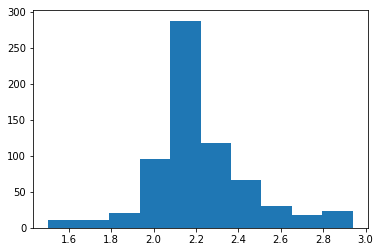

In [6]:
# show distribution of one column
# notice the scale on the x-axis is not 0 to 1
plt.hist(dfx['C1'])
plt.show()

In [7]:
# import the preprocessing package from sklearn 
from sklearn import preprocessing
# define column names
names = dfx.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfxstandard = scaler.fit_transform(dfx)
dfxstandard = pd.DataFrame(dfxstandard, columns=names)

In [8]:
# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfxstandard.describe()

C1            C4            C7           C5p           C6p  \
count  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02   
mean   4.349730e-16 -5.209258e-18 -1.198129e-16  2.526490e-16  1.302314e-17   
std    1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00   
min   -3.003061e+00 -3.046376e+00 -2.399915e+00 -3.102103e+00 -7.599327e-01   
25%   -5.153933e-01 -6.437258e-01 -5.786323e-01 -5.790170e-01 -7.599327e-01   
50%   -1.713321e-01  5.185370e-02 -1.173100e-01 -1.739843e-02 -7.599327e-01   
75%    3.874430e-01  7.270006e-01  4.899995e-01  5.384331e-01  1.137369e+00   
max    3.021539e+00  2.644349e+00  3.072691e+00  3.376582e+00  2.185558e+00   

                T4p           T3p           T5p           S1p           S2p  \
count  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02   
mean   3.906943e-17 -1.640916e-16 -5.834369e-16  7.553424e-16  8.673414e-16   
std    1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00   
min   -3.298472e+00 -1.048432e+01 -7.097014e+00 -3.524817e+00 -3.339817e+00   
25%   -6.788185e-01 -1.576317e-02 -5.210960e-01 -6.122202e-01 -6.705572e-01   
50%    8.814044e-03  8.663082e-02  3.001249e-02 -5.685988e-02 -5.355699e-02   
75%    6.512552e-01  1.800982e-01  5.425222e-01  6.045883e-01  5.953648e-01   
max    3.507759e+00  1.042032e+01  9.811768e+00  3.949526e+00  3.532901e+00   

                S3p  
count  6.820000e+02  
mean  -2.734860e-17  
std    1.000734e+00  
min   -3.579624e+00  
25%   -6.559391e-01  
50%    1.740494e-03  
75%    5.456494e-01  
max    4.297564e+00

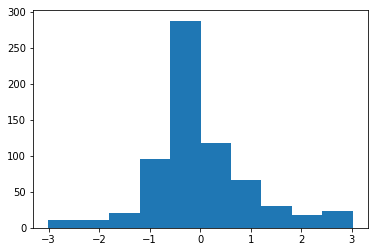

In [9]:
# notice different scale on the x-axis
# data has bee scaled correctly 
plt.hist(dfxstandard['C1'])
plt.show()

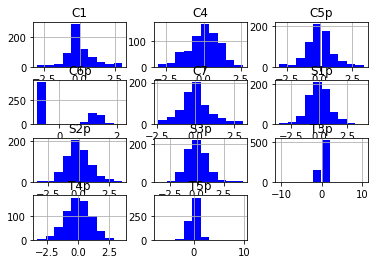

In [10]:
# examine distribution for all variables 
for col in dfxstandard.columns:
    dfxstandard.hist(color='blue') #, range=(-2,2))
    break
plt.show()

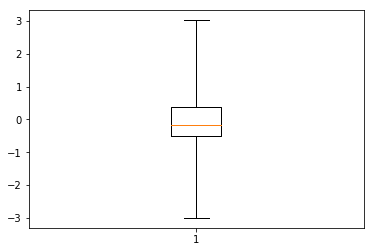

In [11]:
# use boxplots as another way to check if the variables have been scaled correctly
# mean line should line up with the 0 tick mark on the left axis 
plt.boxplot(dfxstandard['C1'], whis='range')
plt.show()

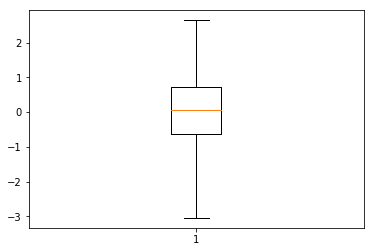

In [13]:
plt.boxplot(dfxstandard['C4'], whis='range')
plt.show()

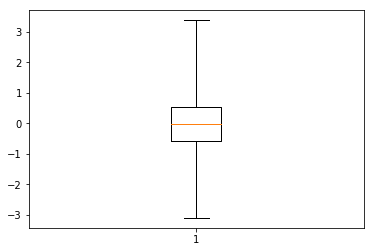

In [14]:
plt.boxplot(dfxstandard['C5p'], whis='range')
plt.show()

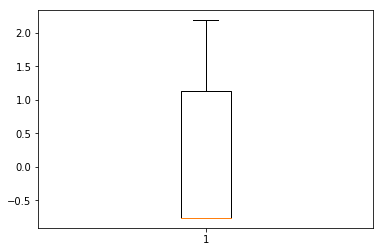

In [15]:
plt.boxplot(dfxstandard['C6p'], whis='range')
plt.show()

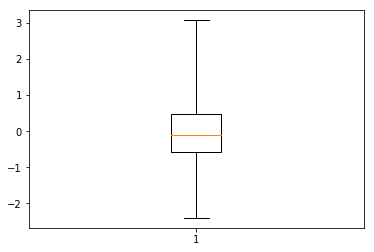

In [16]:
plt.boxplot(dfxstandard['C7'], whis='range')
plt.show()

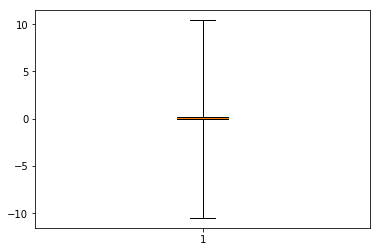

In [17]:
plt.boxplot(dfxstandard['T3p'], whis='range')
plt.show()

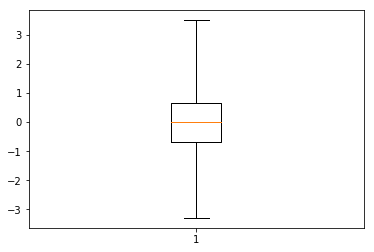

In [18]:
plt.boxplot(dfxstandard['T4p'], whis='range')
plt.show()

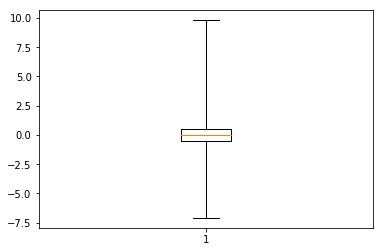

In [19]:
plt.boxplot(dfxstandard['T5p'], whis='range')
plt.show()

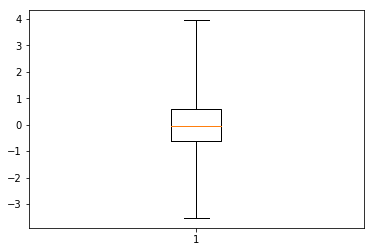

In [20]:
plt.boxplot(dfxstandard['S1p'], whis='range')
plt.show()

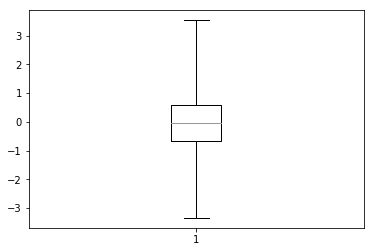

In [21]:
plt.boxplot(dfxstandard['S2p'], whis='range')
plt.show()

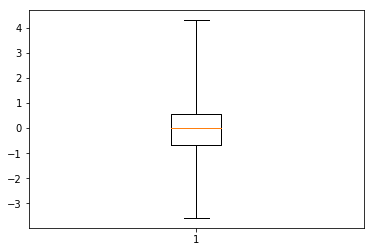

In [22]:
plt.boxplot(dfxstandard['S3p'], whis='range')
plt.show()

In [23]:
# concat dfxstandard with dfbinary to create an updated dfx dataframe
dfx = pd.concat([dfxstandard, dfbinary], axis=1)
dfx.head()

C1        C4        C7       C5p       C6p       T4p       T3p  \
0  0.030756  0.669243 -0.477847  0.056127  1.282356  0.168742  0.174345   
1  1.279824 -0.643726 -0.789310  2.434275 -0.759933  0.229402  0.099767   
2 -0.431183  0.410546 -1.277684 -0.231083 -0.759933  0.118150  0.177807   
3  0.907828  0.389135 -1.226569 -0.274697 -0.759933 -1.243939  0.233959   
4 -0.603838 -1.310426  1.026514 -0.020075  1.027869 -0.574282  0.023718   

        T5p       S1p       S2p       S3p   C2  C3p  
0  0.310826 -0.146970  0.165628 -0.128062  1.0    0  
1 -0.016168 -1.240880  0.781633 -0.147676  0.0    1  
2  1.107680  2.767209 -0.974221  0.044649  1.0    1  
3  1.094210  2.091907 -0.602916  0.697829  1.0    1  
4 -0.357465 -0.364704  0.449384 -0.006421  1.0    0

In [24]:
# verify that the correct values are being used in the new dataframe
dfx.describe()

C1            C4            C7           C5p           C6p  \
count  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02   
mean   4.349730e-16 -5.209258e-18 -1.198129e-16  2.526490e-16  1.302314e-17   
std    1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00   
min   -3.003061e+00 -3.046376e+00 -2.399915e+00 -3.102103e+00 -7.599327e-01   
25%   -5.153933e-01 -6.437258e-01 -5.786323e-01 -5.790170e-01 -7.599327e-01   
50%   -1.713321e-01  5.185370e-02 -1.173100e-01 -1.739843e-02 -7.599327e-01   
75%    3.874430e-01  7.270006e-01  4.899995e-01  5.384331e-01  1.137369e+00   
max    3.021539e+00  2.644349e+00  3.072691e+00  3.376582e+00  2.185558e+00   

                T4p           T3p           T5p           S1p           S2p  \
count  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02  6.820000e+02   
mean   3.906943e-17 -1.640916e-16 -5.834369e-16  7.553424e-16  8.673414e-16   
std    1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00  1.000734e+00   
min   -3.298472e+00 -1.048432e+01 -7.097014e+00 -3.524817e+00 -3.339817e+00   
25%   -6.788185e-01 -1.576317e-02 -5.210960e-01 -6.122202e-01 -6.705572e-01   
50%    8.814044e-03  8.663082e-02  3.001249e-02 -5.685988e-02 -5.355699e-02   
75%    6.512552e-01  1.800982e-01  5.425222e-01  6.045883e-01  5.953648e-01   
max    3.507759e+00  1.042032e+01  9.811768e+00  3.949526e+00  3.532901e+00   

                S3p          C2         C3p  
count  6.820000e+02  682.000000  682.000000  
mean  -2.734860e-17    0.863636    0.463343  
std    1.000734e+00    0.343426    0.499020  
min   -3.579624e+00    0.000000    0.000000  
25%   -6.559391e-01    1.000000    0.000000  
50%    1.740494e-03    1.000000    0.000000  
75%    5.456494e-01    1.000000    1.000000  
max    4.297564e+00    1.000000    1.000000

In [25]:
# read in y variables csv file
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

pIPO    pH    pL      p1day  Pmid  Y1  Y2
0  10.0   9.5   8.5  11.870000   9.0   0   1
1   8.0  10.0   8.0   7.250000   9.0   1   0
2   7.0  14.0  12.0   6.700000  13.0   1   0
3  11.5  16.0  14.0  12.390000  15.0   1   1
4  21.0  21.0  19.0  56.599998  20.0   0   1

In [26]:
# read in id csv file
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()

I1                                  I2    I3
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834
2  ACAD          ACADIA PHARMACEUTICALS INC  2834
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492

In [27]:
# concat dfid and dfy
df = pd.concat([dfid, dfy], axis=1)
df.head()

I1                                  I2    I3  pIPO    pH    pL  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674  10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834   8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834   7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834  11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492  21.0  21.0  19.0   

       p1day  Pmid  Y1  Y2  
0  11.870000   9.0   0   1  
1   7.250000   9.0   1   0  
2   6.700000  13.0   1   0  
3  12.390000  15.0   1   1  
4  56.599998  20.0   0   1

In [28]:
# concat df and dfx to get the full dataframe
df = pd.concat([df, dfx], axis=1)
df.head()

I1                                  I2    I3  pIPO    pH    pL  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674  10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834   8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834   7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834  11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492  21.0  21.0  19.0   

       p1day  Pmid  Y1  Y2 ...        C5p       C6p       T4p       T3p  \
0  11.870000   9.0   0   1 ...   0.056127  1.282356  0.168742  0.174345   
1   7.250000   9.0   1   0 ...   2.434275 -0.759933  0.229402  0.099767   
2   6.700000  13.0   1   0 ...  -0.231083 -0.759933  0.118150  0.177807   
3  12.390000  15.0   1   1 ...  -0.274697 -0.759933 -1.243939  0.233959   
4  56.599998  20.0   0   1 ...  -0.020075  1.027869 -0.574282  0.023718   

        T5p       S1p       S2p       S3p   C2  C3p  
0  0.310826 -0.146970  0.165628 -0.128062  1.0    0  
1 -0.016168 -1.240880  0.781633 -0.147676  0.0    1  
2  1.107680  2.767209 -0.974221  0.044649  1.0    1  
3  1.094210  2.091907 -0.602916  0.697829  1.0    1  
4 -0.357465 -0.364704  0.449384 -0.006421  1.0    0  

[5 rows x 23 columns]

In [29]:
# export total dataframe 
df.to_csv('../csv_files/p2final.csv')

In [30]:
# export only dfx dataframe 
dfx.to_csv('../csv_files/p2zscorex.csv')